<a href="https://colab.research.google.com/github/AshvinVignesh/Spam-Mail-Detection/blob/main/SPAM_MAIL_CW_(DecisionTree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
headers = ['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over','word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail','word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project','word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_%3B','char_freq_%28','char_freq_%5B','char_freq_%21','char_freq_%24','char_freq_%23','capital_run_length_average','capital_run_length_longest','capital_run_length_total','class']

df = pd.read_csv('spambase.data', header=None, names=headers)

In [3]:
df.describe

<bound method NDFrame.describe of       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0               0.00               0.64           0.64           0.0   
1               0.21               0.28           0.50           0.0   
2               0.06               0.00           0.71           0.0   
3               0.00               0.00           0.00           0.0   
4               0.00               0.00           0.00           0.0   
...              ...                ...            ...           ...   
4596            0.31               0.00           0.62           0.0   
4597            0.00               0.00           0.00           0.0   
4598            0.30               0.00           0.30           0.0   
4599            0.96               0.00           0.00           0.0   
4600            0.00               0.00           0.65           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0              0.32     

In [4]:
df = df.drop_duplicates()

In [5]:
df= df.dropna()
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [6]:
df.shape

(4210, 58)

**TRAIN SPLIT**

In [7]:
X = df.drop(columns=['class'])
y= df['class'].values

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [10]:
X = pd.DataFrame( data = scaled_data , columns =X.columns)

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components=5)
principle_components =pca.fit_transform(X)

In [13]:
X = pd.DataFrame(data = principle_components, columns=['PC1', 'PC2','PC3','PC4','PC5'])
X.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.766906,0.049478,-0.638968,0.047745,-0.299362
1,-1.293575,2.006988,0.072936,-0.472332,-0.231408
2,-1.612748,4.821013,3.142734,-1.051379,1.634090
3,-0.857217,0.414218,-0.546352,-0.020159,-0.012509
4,-0.858071,0.413550,-0.548493,-0.020370,-0.012589


Text(0.5, 1.0, 'scree plot')

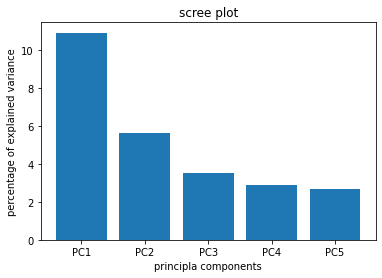

In [14]:
per_var =np.round(pca.explained_variance_ratio_ * 100 , decimals=1)
label = ['PC' + str(x) for x in range(1,len(per_var) + 1 )]
plt.bar(x=range(1,len(per_var)+1),height = per_var , tick_label = label)
plt.ylabel("percentage of explained variance")
plt.xlabel('principla components')
plt.title('scree plot')

In [15]:
# pca = PCA(n_components= 4)
# principle_components = pca.fit_transform(X)

In [16]:
# X = pd.DataFrame(data = principle_components, columns=['PC1', 'PC2','PC3','PC4'])


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [19]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 5 , random_state= 42)

In [20]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [21]:
from sklearn import tree


In [22]:
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_0 <= -0.63
|   |--- feature_1 <= 0.12
|   |   |--- feature_3 <= 0.06
|   |   |   |--- feature_1 <= -0.02
|   |   |   |   |--- feature_1 <= -0.29
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  -0.29
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  -0.02
|   |   |   |   |--- feature_4 <= -0.31
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_4 >  -0.31
|   |   |   |   |   |--- class: 1
|   |   |--- feature_3 >  0.06
|   |   |   |--- feature_4 <= 0.11
|   |   |   |   |--- feature_1 <= -0.86
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  -0.86
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_4 >  0.11
|   |   |   |   |--- feature_2 <= -0.20
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  -0.20
|   |   |   |   |   |--- class: 1
|   |--- feature_1 >  0.12
|   |   |--- feature_1 <= 1.08
|   |   |   |--- feature_3 <= -0.36
|   |   |   |   |--- feature_3 <= -0.86
|   |   |   |   |  

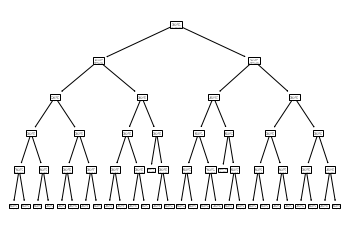

In [23]:
tree.plot_tree(dtree);

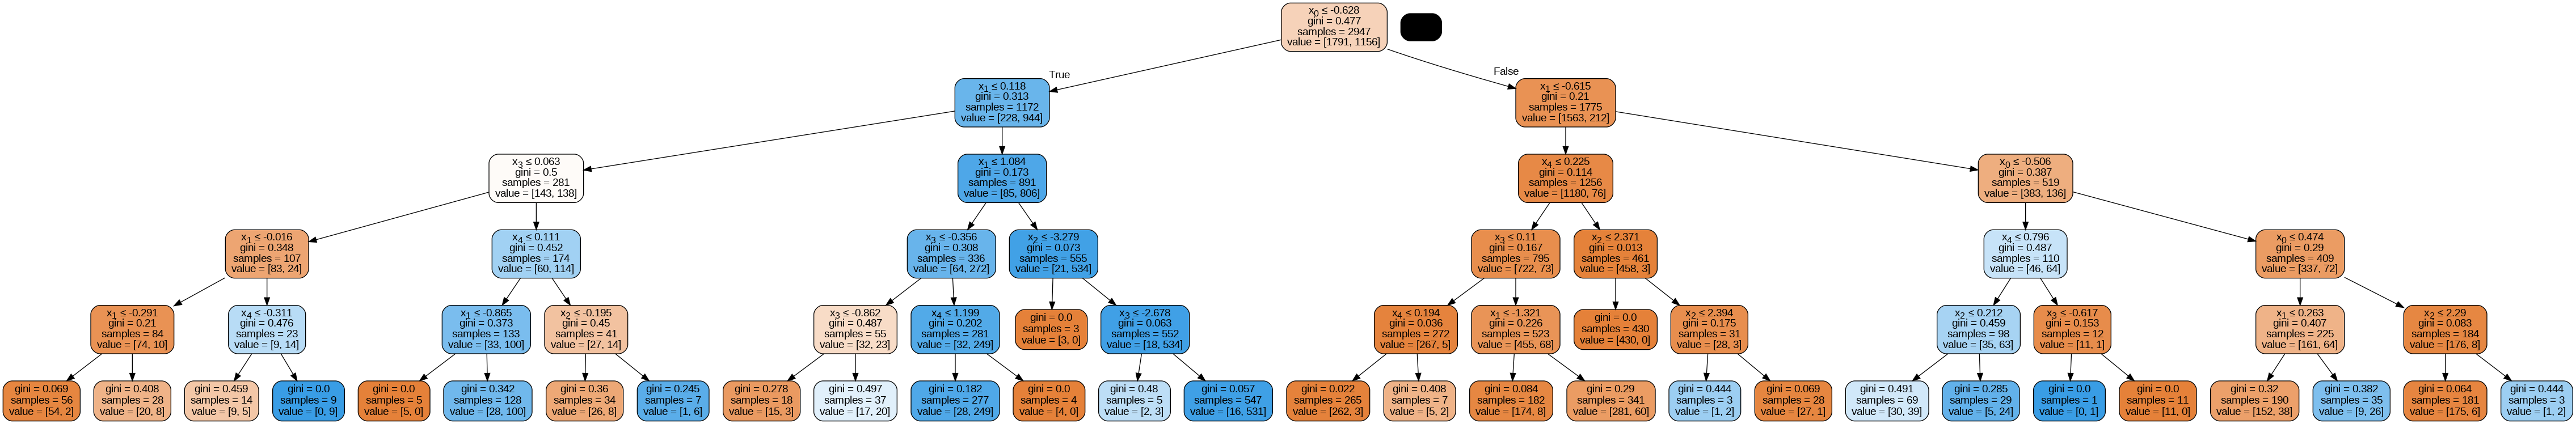

In [24]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [25]:
prediction = dtree.predict(X_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       740
           1       0.86      0.84      0.85       523

    accuracy                           0.88      1263
   macro avg       0.88      0.87      0.87      1263
weighted avg       0.88      0.88      0.88      1263



In [28]:
print(confusion_matrix(y_test,prediction))

[[668  72]
 [ 82 441]]


**ACCURACY**

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
y_pred=dtree.predict(X_test)
acc =accuracy_score(y_test,y_pred)
print(acc*100)

87.8068091844814


Pre pruning 

In [31]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [33]:
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [35]:
model = gcv.best_estimator_
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 0.9104173736002714
Test score 0.8788598574821853


post pruning

In [36]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.00000000e+00 1.13109377e-04 1.13109377e-04 2.26218754e-04
 2.26218754e-04 2.90852683e-04 3.08480118e-04 3.08480118e-04
 3.11050786e-04 3.15090407e-04 3.16706255e-04 3.18120122e-04
 3.18120122e-04 3.22361724e-04 3.22361724e-04 3.22361724e-04
 3.23169648e-04 3.23904124e-04 3.24574733e-04 3.25189458e-04
 3.26021145e-04 3.26760422e-04 3.27209269e-04 3.28382062e-04
 3.30844927e-04 3.31436778e-04 3.32158241e-04 3.37320272e-04
 3.37712282e-04 3.37871786e-04 3.38435162e-04 3.39328130e-04
 4.04812506e-04 4.07193756e-04 4.14734381e-04 4.24160163e-04
 4.44833515e-04 4.52437507e-04 4.52437507e-04 4.52437507e-04
 4.52437507e-04 4.52437507e-04 4.52437507e-04 4.52437507e-04
 4.52437507e-04 4.52437507e-04 4.52437507e-04 4.57931742e-04
 4.74584798e-04 4.84754472e-04 4.84754472e-04 4.92573092e-04
 4.94853523e-04 4.97612204e-04 5.08992195e-04 5.08992195e-04
 5.08992195e-04 5.08992195e-04 5.08992195e-04 5.08992195e-04
 5.11529906e-04 5.12367951e-04 5.15003042e-04 5.16135946e-04
 5.17071437e-04 5.170714

In [37]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

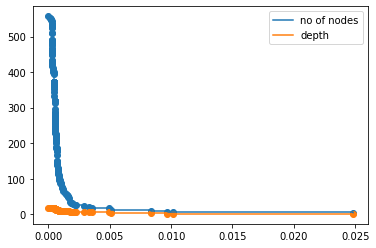

In [38]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

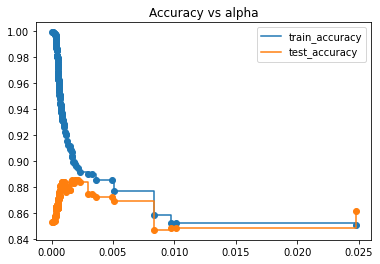

In [40]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

In [49]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.006)
clf_.fit(X_train,y_train)
y_train_pred = clf_.predict(X_train)
y_test_pred = clf_.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 0.8768238887003733
Test score 0.8693586698337292
